## Import useful libraries and read in the image.

In [65]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
img  = cv2.imread("cells.png")

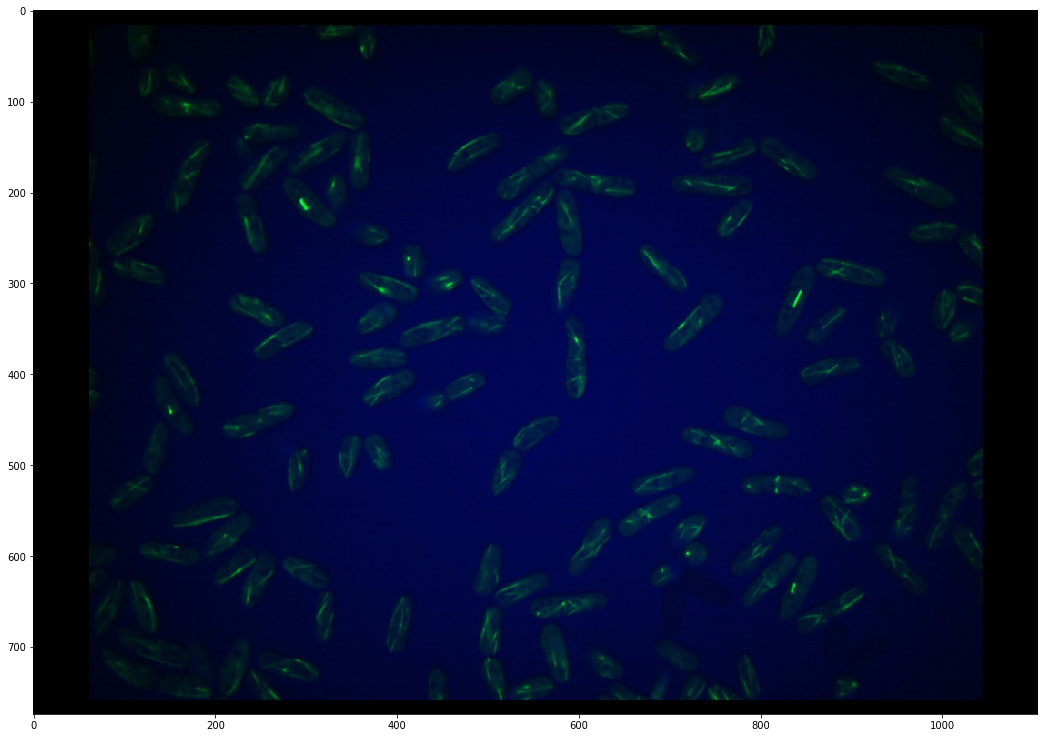

In [67]:
plt.figure(figsize=(18, 16))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Crop black boundaries.

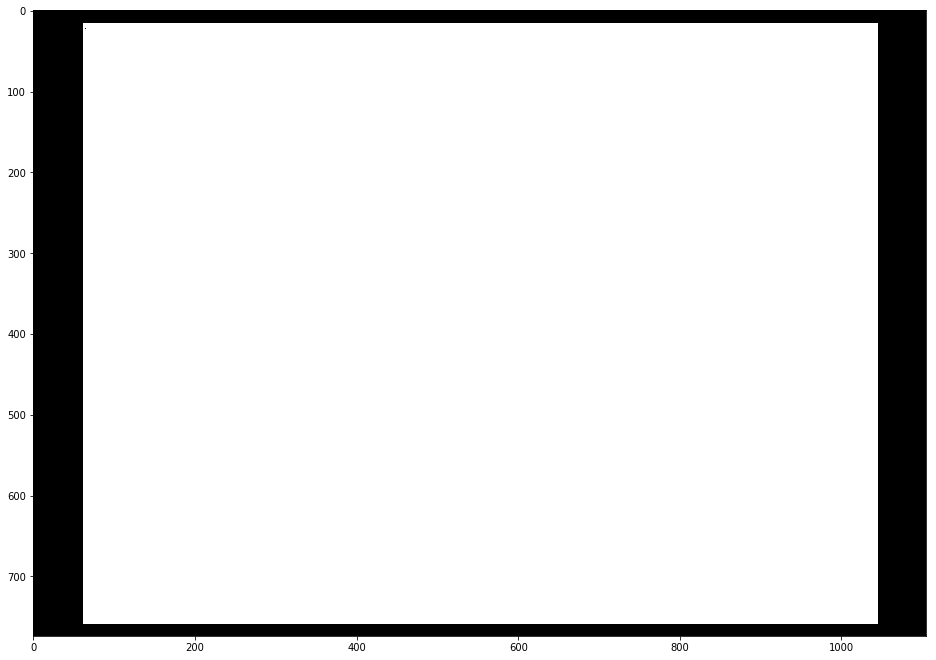

In [68]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_,thresh = cv2.threshold(gray,1,255,cv2.THRESH_BINARY)

plt.figure(figsize=(16, 16))
plt.imshow(thresh, cmap='gray')

## Crop the image.

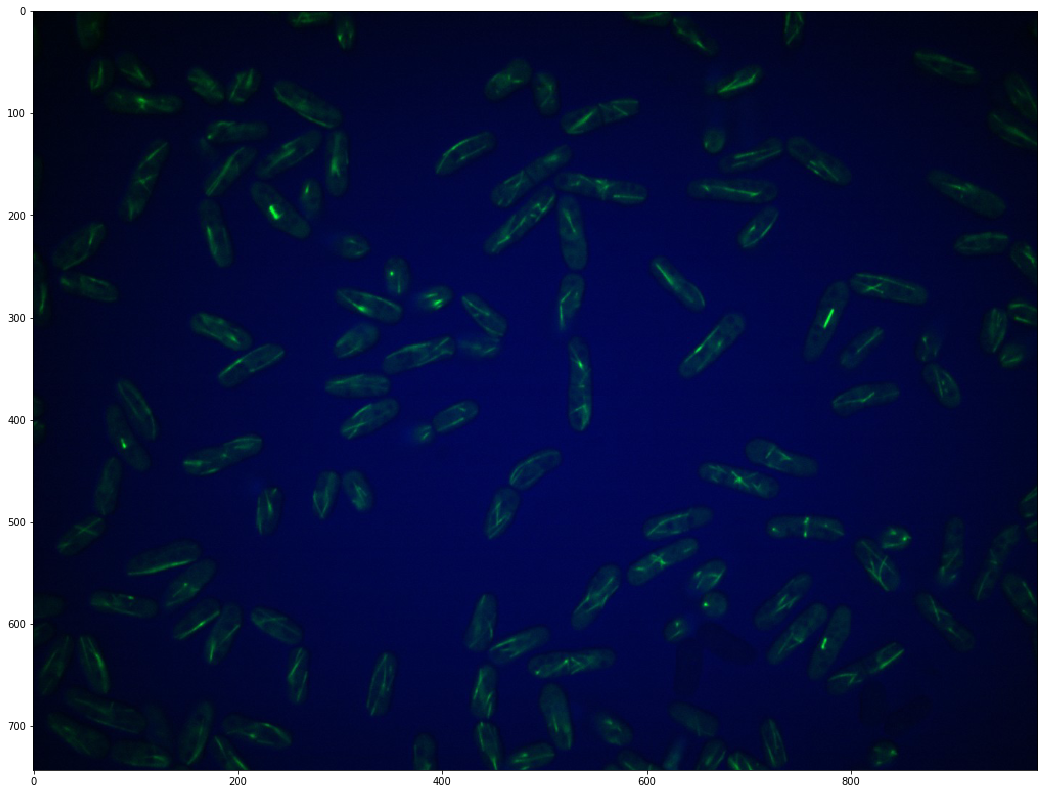

In [69]:
# find contours
contours = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
x,y,w,h = cv2.boundingRect(cnt)
# crop the image 
crop = img[y:y+h,x:x+w]
# display cropped image
plt.figure(figsize=(18, 16))
plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))

In [70]:
# Introduce Gaussian blur
#blur = cv2.GaussianBlur(crop, (15,15), 0)

#plt.figure(figsize=(18, 16))
#plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))

## Convert the image to gray scale.

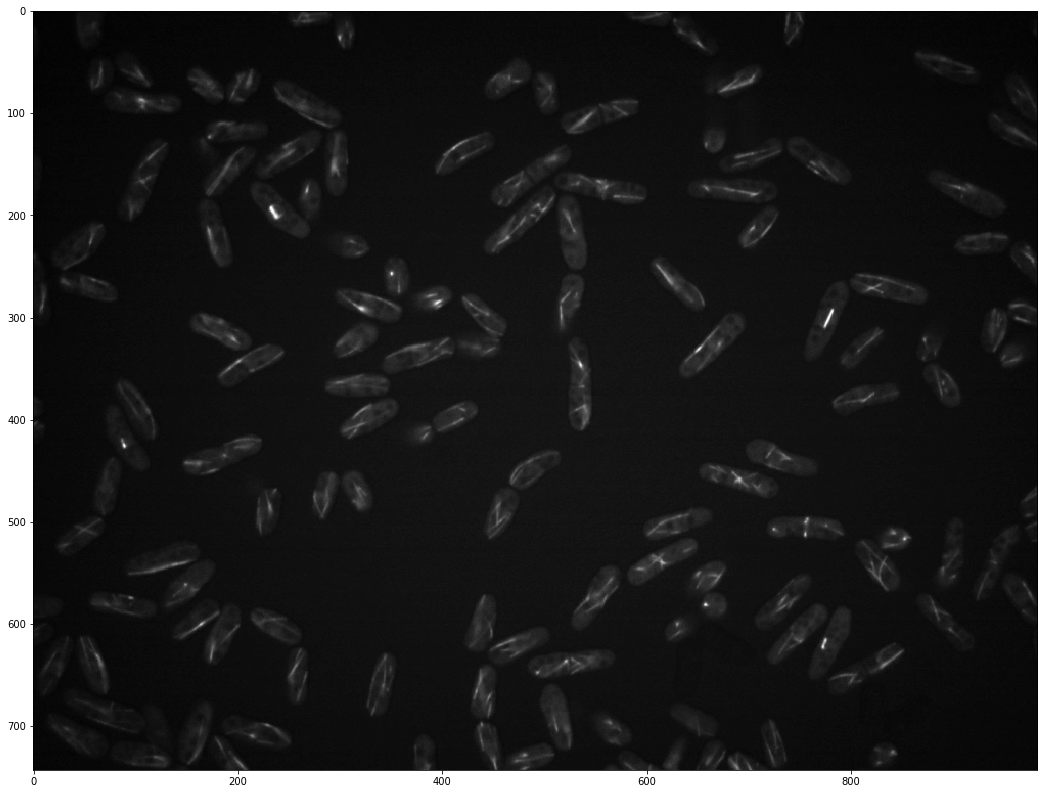

In [71]:
gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(18, 16))
plt.imshow(gray, cmap='gray')

## Enhance local contrast.

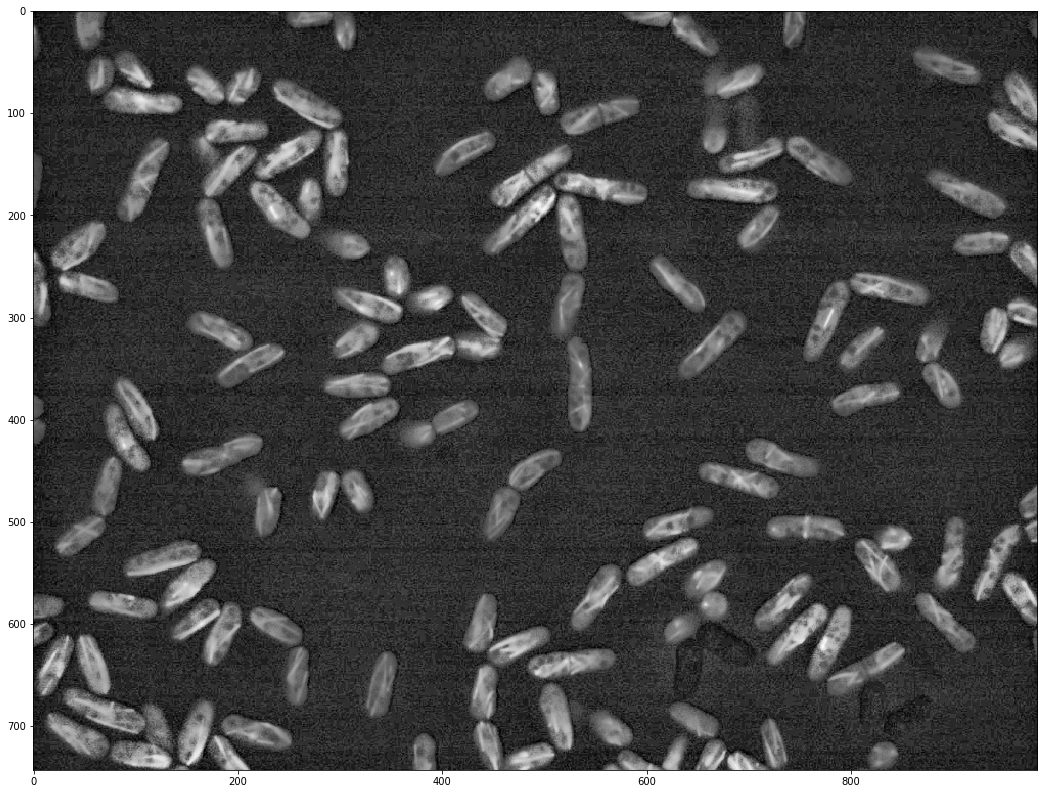

In [72]:
gridsize1 = 15
gridsize2 = 15

clahe = cv2.createCLAHE(clipLimit=15.0, tileGridSize=(gridsize1,gridsize2))

gray_contrast = clahe.apply(gray)

plt.figure(figsize=(18, 16))
plt.imshow(gray_contrast, cmap='gray')

## Apply bilateral filter.

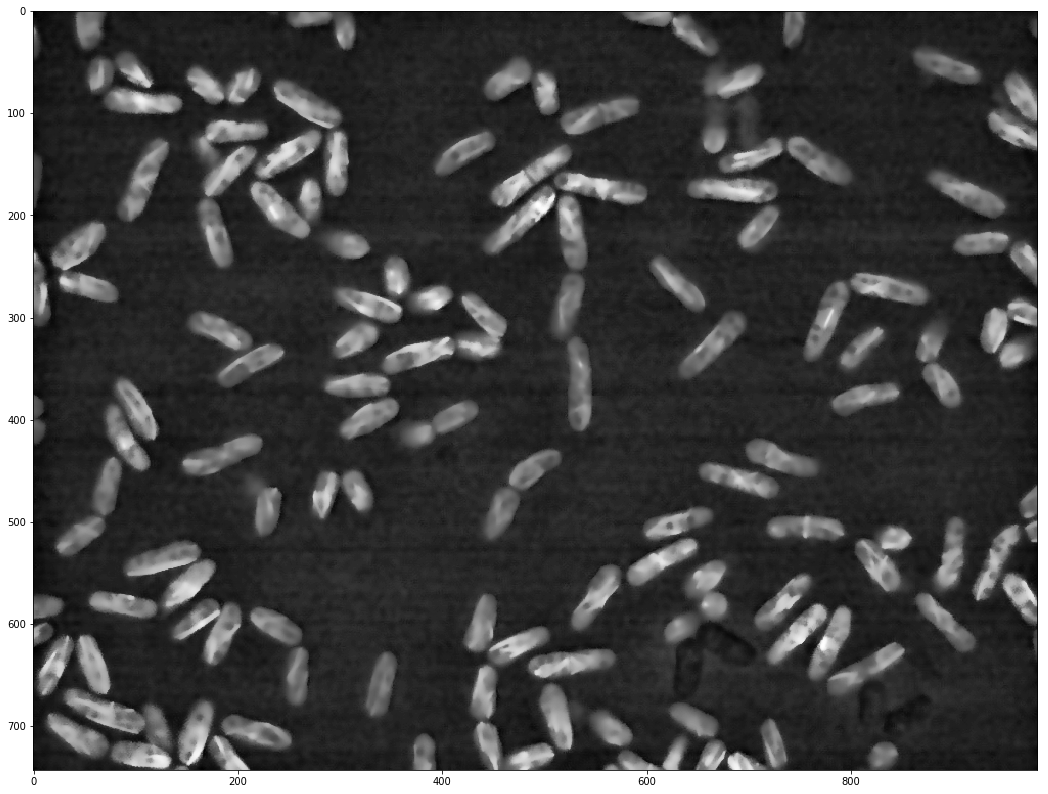

In [73]:
gray_contrast = cv2.bilateralFilter(gray_contrast,9,30,30)
plt.figure(figsize=(18, 16))
plt.imshow(gray_contrast, cmap='gray')

## Apply thresholding to separate cells from the background.

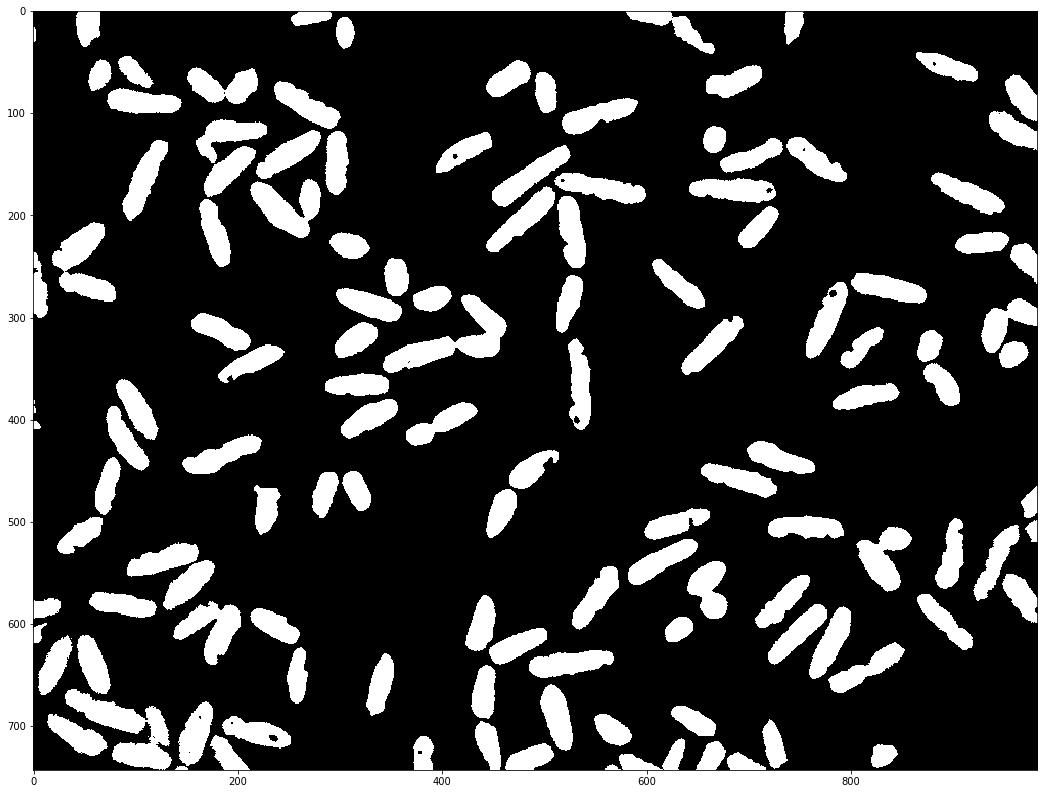

In [74]:
_, thresh = cv2.threshold(gray_contrast, 80, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(18, 16))
plt.imshow(thresh, cmap='gray')

## Apply erosion to separate connected cells

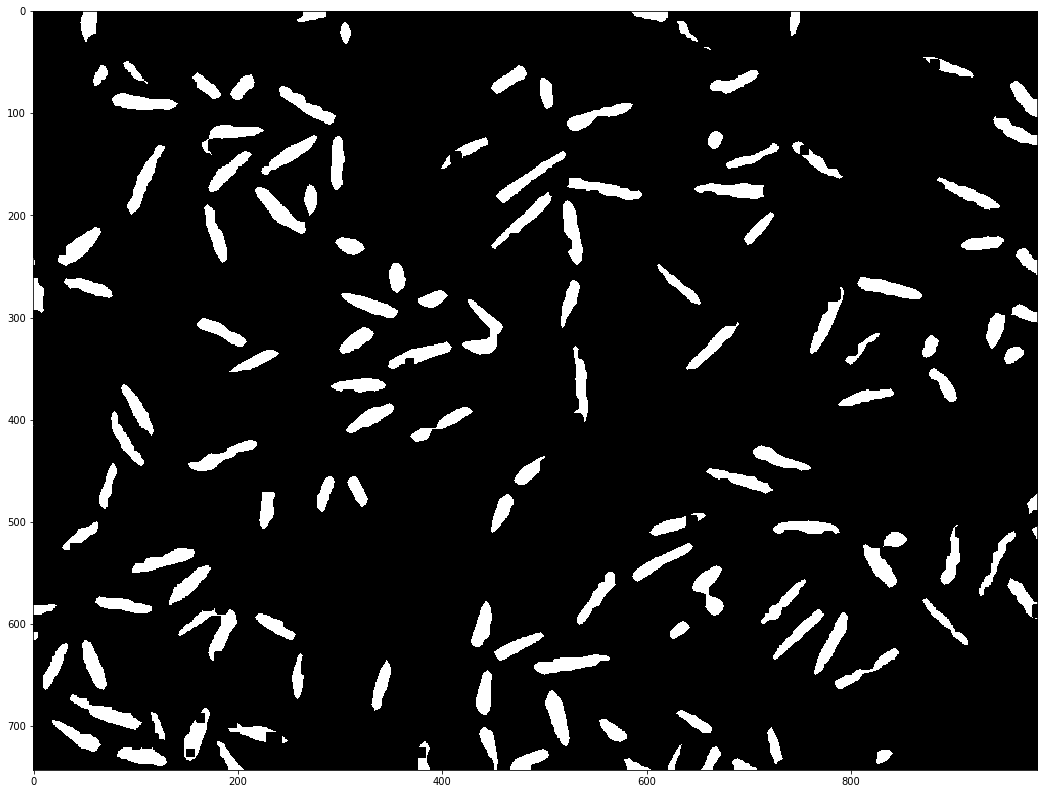

In [75]:
kernel = np.ones((8,8),np.uint8)
erosion = cv2.erode(thresh,kernel,iterations = 1)
plt.figure(figsize=(18, 16))
plt.imshow(erosion, cmap='gray')

## Count the cells.

In [76]:
n_centers = cv2.connectedComponents(erosion)[0] - 1
print('There are %d cells in the image.'%n_centers)

There are 141 cells in the image.


## Count white pixels.

In [77]:
n_white_pix = np.sum(close == 255)
print('There are %d white pixels in the image.'%n_white_pix)

There are 129391 white pixels in the image.


## Count average area cells.

In [78]:
avg_cell_size = n_white_pix/n_centers
avg_cell_size
print('Average cell area: %d pixels.'%avg_cell_size)

Average cell area: 917 pixels.


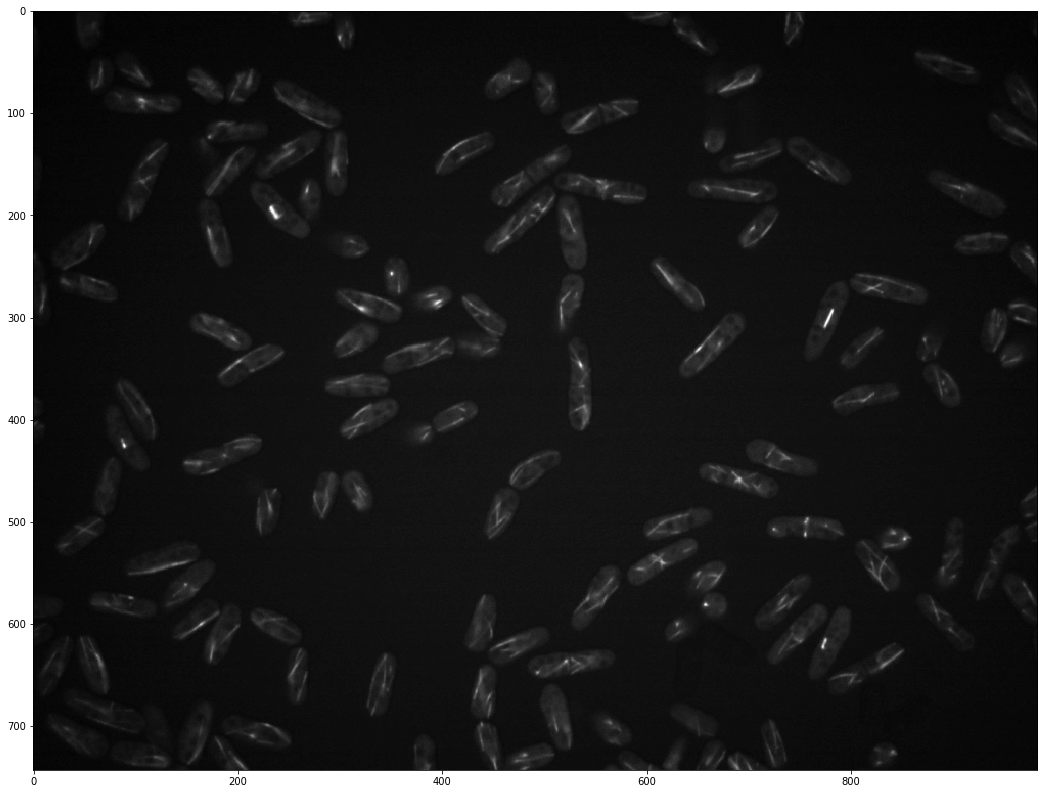

In [79]:
plt.figure(figsize=(18, 16))
plt.imshow(gray, cmap='gray')

## Average intensity of cells.

In [80]:
avg_cell_int = np.mean(gray[close == 255])
print('Average cell intensity: %d.'%avg_cell_int)

Average cell intensity: 23.
